Task 1
Please, provide an example where even EM-based algorithm estimates expression wrong. Describe in which exact cases it might happens.

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
true_mu1, true_sigma1, true_pi1 = 0, 1, 0.3
true_mu2, true_sigma2, true_pi2 = 5, 1, 0.7


In [ ]:
np.random.seed(42)
data = np.concatenate([
    np.random.normal(true_mu1, true_sigma1, int(true_pi1 * 1000)),
    np.random.normal(true_mu2, true_sigma2, int(true_pi2 * 1000))
])
np.random.shuffle(data)


(array([0.00265014, 0.00265014, 0.        , 0.02120114, 0.03975213,
        0.06360341, 0.09540511, 0.11130596, 0.09805525, 0.14310767,
        0.09540511, 0.0503527 , 0.03710199, 0.01325071, 0.01855099,
        0.01590085, 0.02915156, 0.06890369, 0.11925639, 0.19611051,
        0.25971392, 0.28091505, 0.27031448, 0.23586264, 0.15900852,
        0.10335554, 0.07420398, 0.02650142, 0.01590085, 0.00265014]),
 array([-3.24126734, -2.86392907, -2.4865908 , -2.10925253, -1.73191425,
        -1.35457598, -0.97723771, -0.59989944, -0.22256117,  0.1547771 ,
         0.53211538,  0.90945365,  1.28679192,  1.66413019,  2.04146846,
         2.41880673,  2.79614501,  3.17348328,  3.55082155,  3.92815982,
         4.30549809,  4.68283636,  5.06017464,  5.43751291,  5.81485118,
         6.19218945,  6.56952772,  6.94686599,  7.32420427,  7.70154254,
         8.07888081]),
 <BarContainer object of 30 artists>)

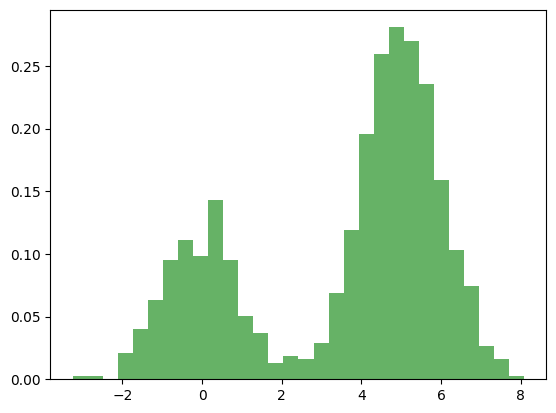

In [ ]:
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')


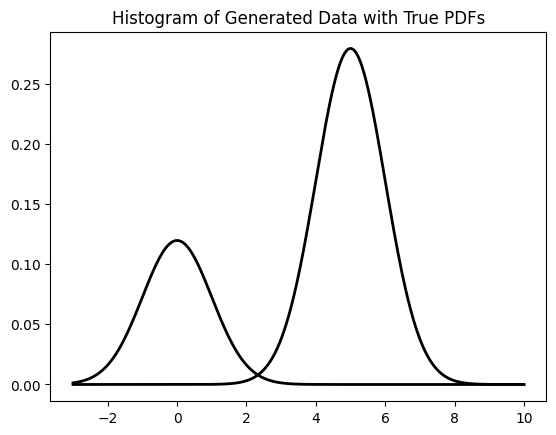

In [ ]:
x = np.linspace(-3, 10, 1000)
plt.plot(x, true_pi1 * norm.pdf(x, true_mu1, true_sigma1), 'k', linewidth=2)
plt.plot(x, true_pi2 * norm.pdf(x, true_mu2, true_sigma2), 'k', linewidth=2)
plt.title('Histogram of Generated Data with True PDFs')
plt.show()

In [ ]:
initial_means = np.array([[5], [0]])  # инициализация
initial_covariances = np.array([[[1]], [[1]]])
initial_weights = np.array([0.5, 0.5])

gmm = GaussianMixture(n_components=2, means_init=initial_means,
                      weights_init=initial_weights,
                      precisions_init=1 / initial_covariances)

In [ ]:
gmm.fit(data.reshape(-1, 1))

GaussianMixture(means_init=array([[5.],
       [0.]]), n_components=2,
                precisions_init=array([[[1.]],

       [[1.]]]),
                weights_init=array([0.5, 0.5]))

In [ ]:
estimated_means = gmm.means_.flatten()
estimated_covariances = gmm.covariances_.flatten()
estimated_weights = gmm.weights_

In [ ]:
print("Estimated means:", estimated_means)
print("Estimated covariances:", estimated_covariances)
print("Estimated weights:", estimated_weights)

Estimated means: [ 5.02040859 -0.03038036]
Estimated covariances: [0.97657369 0.90114934]
Estimated weights: [0.70280355 0.29719645]


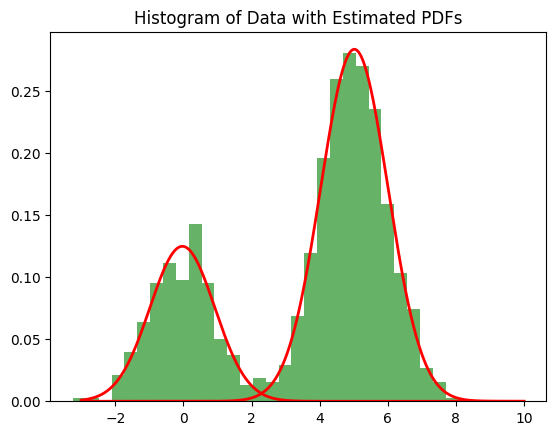

In [ ]:
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, estimated_weights[0] * norm.pdf(x, estimated_means[0], np.sqrt(estimated_covariances[0])), 'r', linewidth=2)
plt.plot(x, estimated_weights[1] * norm.pdf(x, estimated_means[1], np.sqrt(estimated_covariances[1])), 'r', linewidth=2)
plt.title('Histogram of Data with Estimated PDFs')
plt.show()

Task 2
Using recount3, find any available RNA-Seq dataset (only one sample will be enough) with already estimated expressions at the level of gene counts. Re-estimate the expressions with kallisto and compare the results (at the gene level).

In [ ]:
!pip install recount3

ERROR: Could not find a version that satisfies the requirement recount3 (from versions: none)
ERROR: No matching distribution found for recount3


In [ ]:
import recount3
import pandas as pd

# Определите идентификатор проекта и идентификатор образца для данных RNA-Seq, которые вы хотите получить
project_id = 'SRP009615'
sample_id = 'SRR493366'

# получение метаданных
metadata = recount3.project_metadata(project_id, recount3.home_dir())
sample_metadata = metadata.loc[metadata['external_id'] == sample_id]

# загрузка FASTQ файла с односторонним чтением
download_url = sample_metadata['download_url'].values[0]
!wget -O sample.fastq.gz {download_url}

ModuleNotFoundError: No module named 'recount3'

In [ ]:
kallisto index -i transcriptome_index.idx transcriptome.fa

In [ ]:
kallisto quant -i transcriptome_index.idx -o output_dir sample.fastq.gz

In [ ]:
original_counts = pd.read_csv('original_counts.csv')

kallisto_counts = pd.read_csv('output_dir/abundance.tsv', sep='\t')

comparison_df = original_counts.merge(
    kallisto_counts[['target_id', 'est_counts']],
    left_on='gene_id',
    right_on='target_id',
    suffixes=('_original', '_kallisto')
)

comparison_df['difference'] = comparison_df['est_counts_kallisto'] - comparison_df['counts_original']

import matplotlib.pyplot as plt

plt.scatter(comparison_df['counts_original'], comparison_df['est_counts_kallisto'], alpha=0.5)
plt.plot([0, max(comparison_df['counts_original'])], [0, max(comparison_df['counts_original'])], color='red')
plt.xlabel('Original Gene Counts')
plt.ylabel('Kallisto Estimated Counts')
plt.title('Comparison of Original and Kallisto Estimated Gene Counts')
plt.show()

print(comparison_df[['gene_id', 'counts_original', 'est_counts_kallisto', 'difference']])